<a href="https://colab.research.google.com/github/sandyweng/Lung_Cancer_Deep_Learning/blob/main/Inceptionv3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras import models
from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout
from keras.models import Model, Sequential
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [ ]:
!unzip gdrive/My\ Drive/Separated_Images.zip > /dev/null

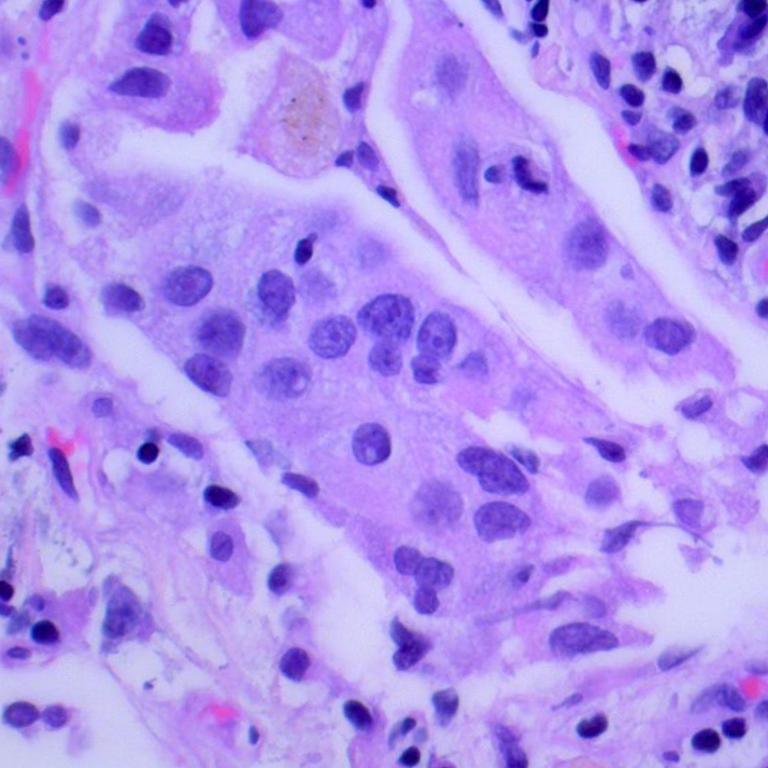

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('Separated_Images/train/lung_aca/lungaca5.jpeg')
img

In [ ]:
train_dir = '/content/Separated_Images/train'

In [ ]:
validation_dir = '/content/Separated_Images/validation'
test_dir = '/content/Separated_Images/test'

In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, layers

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(3, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# rescaling data
train_datagen = ImageDataGenerator(rescale = 1./255.)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150), shuffle=False)     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150), shuffle=False)

Found 9600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.


In [ ]:
# don't want to overwrite previous model
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 6,
            epochs = 20,
            validation_steps = 10)

Epoch 1/20
6/6 [==============================] - 22s 3s/step - loss: 4.6522 - acc: 0.2833 - val_loss: 2.8267 - val_acc: 0.0450
Epoch 2/20
6/6 [==============================] - 16s 3s/step - loss: 2.1138 - acc: 0.2833 - val_loss: 0.3964 - val_acc: 0.8500
Epoch 3/20
6/6 [==============================] - 16s 3s/step - loss: 0.6329 - acc: 0.7583 - val_loss: 0.3751 - val_acc: 0.8550
Epoch 4/20
6/6 [==============================] - 16s 3s/step - loss: 0.5297 - acc: 0.8167 - val_loss: 0.1859 - val_acc: 0.9600
Epoch 5/20
6/6 [==============================] - 16s 3s/step - loss: 0.9844 - acc: 0.7250 - val_loss: 0.5751 - val_acc: 0.7650
Epoch 6/20
6/6 [==============================] - 16s 3s/step - loss: 1.3612 - acc: 0.5833 - val_loss: 0.8278 - val_acc: 0.6600
Epoch 7/20
6/6 [==============================] - 17s 3s/step - loss: 0.3740 - acc: 0.8917 - val_loss: 0.1069 - val_acc: 0.9550
Epoch 8/20
6/6 [==============================] - 16s 3s/step - loss: 0.6637 - acc: 0.8083 - val_loss: 0

In [ ]:
# with callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 75,
            epochs = 100,
            validation_steps = 25,
            callbacks=[callback])


Epoch 1/100
75/75 [==============================] - 102s 1s/step - loss: 0.3484 - acc: 0.8893 - val_loss: 0.4104 - val_acc: 0.8340
Epoch 2/100
75/75 [==============================] - 103s 1s/step - loss: 0.2846 - acc: 0.8933 - val_loss: 0.2097 - val_acc: 0.9080
Epoch 3/100
75/75 [==============================] - 101s 1s/step - loss: 0.1746 - acc: 0.9393 - val_loss: 0.2553 - val_acc: 0.8820
Epoch 4/100
75/75 [==============================] - 102s 1s/step - loss: 0.2101 - acc: 0.9213 - val_loss: 0.7093 - val_acc: 0.7540
Epoch 5/100
75/75 [==============================] - 101s 1s/step - loss: 0.1556 - acc: 0.9480 - val_loss: 0.8795 - val_acc: 0.7100
Epoch 6/100
75/75 [==============================] - 101s 1s/step - loss: 0.1794 - acc: 0.9320 - val_loss: 0.2980 - val_acc: 0.8740
Epoch 7/100
75/75 [==============================] - 101s 1s/step - loss: 0.1519 - acc: 0.9433 - val_loss: 0.1423 - val_acc: 0.9340
Epoch 8/100
75/75 [==============================] - 100s 1s/step - loss: 0.

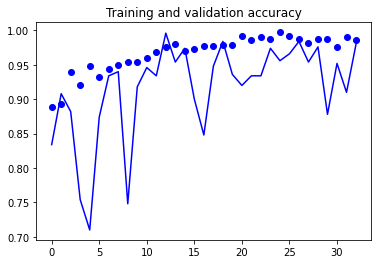

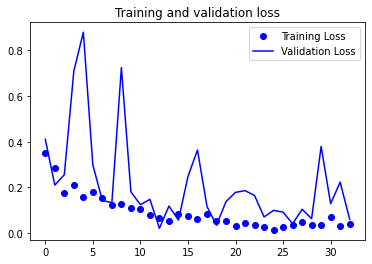

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('inception_full.h5', model)

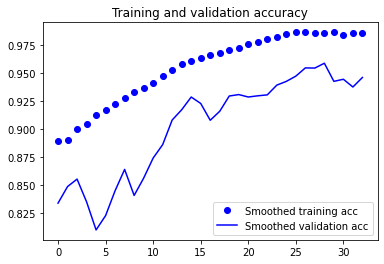

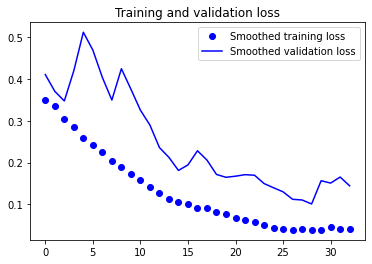

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150),
                                                   shuffle=False)

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 3000 images belonging to 3 classes.


In [ ]:

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 49s 985ms/step - loss: 0.0801 - acc: 0.9730
test acc: 0.9729999899864197


In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [ ]:
class_labels

['lung_aca', 'lung_n', 'lung_scc']

In [ ]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

    lung_aca       0.93      0.97      0.95      1000
      lung_n       1.00      0.99      1.00      1000
    lung_scc       0.97      0.94      0.95      1000

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [ ]:
predictions = model.predict(test_generator)

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(validation_generator, test_generator.samples / test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[770   7  23]
 [ 17 783   0]
 [236   0 564]]


In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(validation_generator, test_generator.samples / test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
conf = confusion_matrix(validation_generator.classes, y_pred, labels=[0,1,2])
print(conf)

Confusion Matrix
[[784   1  15]
 [  4 796   0]
 [ 44   0 756]]


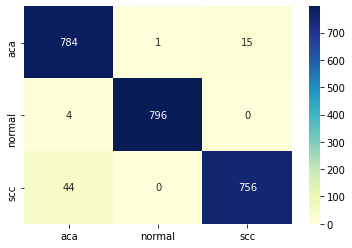

In [ ]:
import seaborn as sns
labels =  np.array([[784,1,15],[4,796,0],[44,0,756]])
sns.heatmap(conf, annot = labels, fmt = 'd', cmap="YlGnBu", xticklabels=['aca', 'normal', 'scc'], yticklabels=['aca','normal', 'scc'])